In [7]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
#Création des structures nécessaires
structure = MPRester("Sq4cCPhZ9eNQbF83").get_structure_by_material_id("mp-984718")
BandStructure = MPRester("Sq4cCPhZ9eNQbF83").get_bandstructure_by_material_id("mp-984718")
#Création des fichiers cifs
structure.to(filename="BAs_mp-984718.cif")
CifWriter(structure,0.1, write_magmoms=False).write_file("BAs_mp-984718_symmetrized.cif")

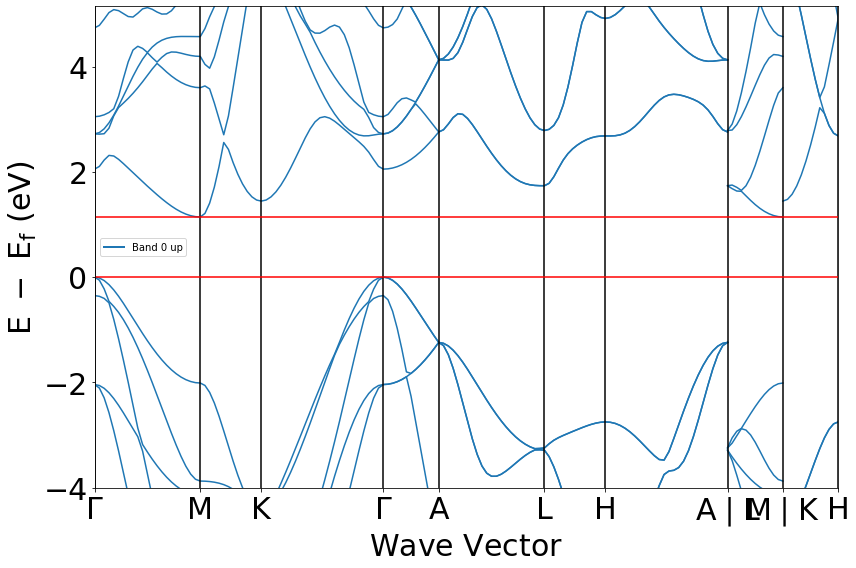

Energie de bande interdite = 1.1428 eV


In [8]:
from pymatgen.electronic_structure import plotter
from matplotlib import pyplot as plt 
#Plot de la structure de bandes
plotter.BSPlotter(BandStructure).get_plot()

#Calcul de l'énergie de bande interdite
Energy = BandStructure.get_band_gap().get("energy")

#Plot des limites de la bande interdite
plt.axhline(0, color="r", linestyle="-")
plt.axhline(Energy, color="r", linestyle="-")
plt.show()
print("Energie de bande interdite = {:.4f} eV".format(Energy))

La bande interdite est délimitée par les deux droites horizontales rouges ci-dessus.   
On voit directement que c'est une bande indirecte: en effet, pour passer de la bande de valence à la bande de conduction, le vecteur d'onde d'un éléctron doit "suivre le chemin" Γ-M.  
Cette bande à une largeur de 1.1428 eV ≈ 1 eV => ce crystal est un semiconducteur électrique.

In [9]:
#Calcul des n° des bandes de valences qui passent par le max de la bande
ValenceBandMax_Data = BandStructure.get_vbm().get("band_index")

#Calcul de la bande max parmis celles cis:
for i in ValenceBandMax_Data.values():
    ValenceBandMax = max(i)
print("Dernière bande de valence = n°{}".format(ValenceBandMax))


#Calcul des n° des bandes de conductions qui passent par le min de la bande
ConductionBandMin_Data = BandStructure.get_cbm().get("band_index")

#Calcul de la bande min parmis celles cis:
for i in ConductionBandMin_Data.values():
    ConductionBandMin = min(i)
print("Première bande de conduction = n°{}".format(ConductionBandMin))

Dernière bande de valence = n°7
Première bande de conduction = n°8


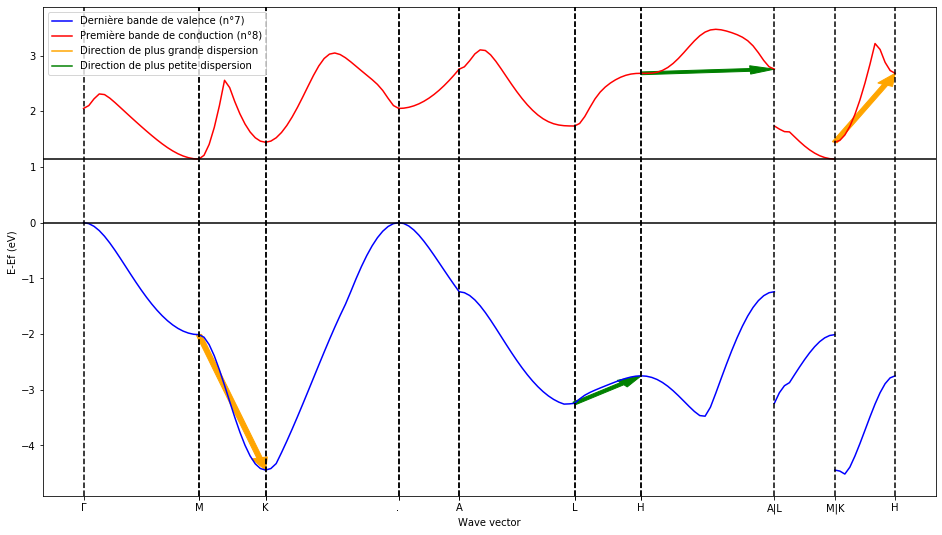

In [10]:
#On stocke les données du vecteur d'onde dans k, les énergies par rapport au niveau de fermi dans Ef
BandStructure_Data = plotter.BSPlotter(BandStructure).bs_plot_data()
k = BandStructure_Data.get("distances")
Ef = BandStructure_Data.get("energy").get("1")

#On plot les deux bandes extremes trouvées ci-dessus
fig, axis = plt.subplots(figsize=(16,9))
for i in range(len(k)):
    plt.plot(k[i],Ef[i][ConductionBandMin],"r")
    plt.plot(k[i],Ef[i][ValenceBandMax],"b")

#Ajout des limites de la bande interdite
plt.axhline(0, color="black", linestyle="-")
plt.axhline(Energy, color="black", linestyle="-")

#Ajout des points de passage du vecteur d'onde k
K_points = BandStructure_Data.get("ticks").get("distance")
for i in range(len(K_points)):
    plt.axvline(K_points[i],0,color="black", linestyle="--")

#Ajout de la légende correspondant à ces points de passage
axis.set_xticks(K_points)
axis.set_xticklabels(["Γ"," ","M"," ","K"," ","Γ"," ", "A"," ","L"," ","H", "A|L", "M|K","H"])

#Calcul des pentes entre chaque "point de passage" = directions de k
#Pour chaque bande, on s'intéresse aux directions de plus grande / de plus faible pente = dispertion
#On stocke les k0, Ef0, dk et dEf de ces directions pour pouvoir tracer des flèches
PenteCond_max = 0
PenteVal_max = 0
for i in range(len(k)):
    dk = (k[i][-1]-k[i][0])
    dEfCond = (Ef[i][ConductionBandMin][-1]-Ef[i][ConductionBandMin][0])
    dEfVal = (Ef[i][ValenceBandMax][-1]-Ef[i][ValenceBandMax][0])
    if (i==0):
        PenteCond_min = abs(dEfCond/dk)
        PenteVal_min = abs(dEfVal/dk)
    if abs(dEfCond/dk) >= PenteCond_max:
        PenteCond_max = abs(dEfCond/dk)
        k0_Cond_Max = k[i][0]
        Ef0_Cond_Max = Ef[i][ConductionBandMin][0]
        dkCond_Max = dk
        dEfCond_Max = dEfCond
    if abs(dEfVal/dk) >= PenteVal_max:
        PenteVal_max =abs(dEfVal/dk)
        k0_Val_Max = k[i][0]
        Ef0_Val_Max = Ef[i][ValenceBandMax][0]
        dkVal_Max = dk
        dEfVal_Max = dEfVal
    if abs(dEfCond/dk) <= PenteCond_min:
        PenteCond_min = abs(dEfCond/dk)
        k0_Cond_Min = k[i][0]
        Ef0_Cond_Min = Ef[i][ConductionBandMin][0]
        dkCond_Min = dk
        dEfCond_Min = dEfCond
    if abs(dEfVal/dk) <= PenteVal_min:
        PenteVal_min =abs(dEfVal/dk)
        k0_Val_Min = k[i][0]
        Ef0_Val_Min = Ef[i][ValenceBandMax][0]
        dkVal_Min = dk
        dEfVal_Min = dEfVal
plt.arrow(k0_Cond_Max,Ef0_Cond_Max,dkCond_Max,dEfCond_Max,length_includes_head=True,width=0.05, color= "orange")
plt.arrow(k0_Val_Max,Ef0_Val_Max,dkVal_Max,dEfVal_Max,length_includes_head=True,width=0.05, color= "orange")
plt.arrow(k0_Cond_Min,Ef0_Cond_Min,dkCond_Min,dEfCond_Min,length_includes_head=True,width=0.05, color= "green")
plt.arrow(k0_Val_Min,Ef0_Val_Min,dkVal_Min,dEfVal_Min,length_includes_head=True,width=0.05, color= "green")

#On ajoute une légende
plt.plot([], label="Dernière bande de valence (n°{})".format(ValenceBandMax), color="blue")
plt.plot([], label="Première bande de conduction (n°{})".format(ConductionBandMin), color="red")
plt.plot([], label="Direction de plus grande dispersion", color="orange")
plt.plot([], label="Direction de plus petite dispersion", color="green")
plt.legend(loc="upper left")

#On renome les axes
plt.ylabel("E-Ef (eV)")
plt.xlabel("Wave vector")

plt.show()

On observe ci dessus que:  
-La dernière bande de valence a une dispertion maximale dans la direction M - K, minimale dans la direction L - H  
-La première bande de conduction a une dispertion maximale dans la direction M|K - H, minimale dans la direction H - A|L

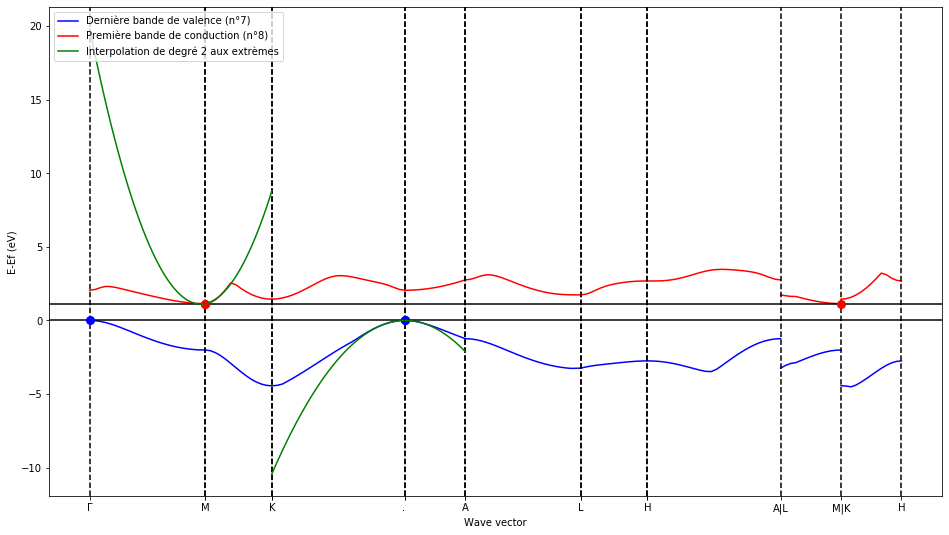

In [11]:
#On RE-plot les deux bandes extremes comme ci-dessus
fig, axis = plt.subplots(figsize=(16,9))
for i in range(len(k)):
    plt.plot(k[i],Ef[i][ConductionBandMin],"r")
    plt.plot(k[i],Ef[i][ValenceBandMax],"b")

#Ajout des limites de la bande interdite
plt.axhline(0, color="black", linestyle="-")
plt.axhline(Energy, color="black", linestyle="-")

#Ajout des points de passage du vecteur d'onde k
K_points = BandStructure_Data.get("ticks").get("distance")
for i in range(len(K_points)):
    plt.axvline(K_points[i],0,color="black", linestyle="--")

#Ajout de la légende correspondant à ces points de passage
axis.set_xticks(K_points)
axis.set_xticklabels(["Γ"," ","M"," ","K"," ","Γ"," ", "A"," ","L"," ","H", "A|L", "M|K","H"])

#On renome les axes
plt.ylabel("E-Ef (eV)")
plt.xlabel("Wave vector")

#Ajout des points max de la bande de valence et min de la bande de conduction
Val_Max_Points=plotter.BSPlotter(BandStructure).bs_plot_data().get("vbm")
Con_Min_Points=plotter.BSPlotter(BandStructure).bs_plot_data().get("cbm")
for i in range(len(Val_Max_Points)):
    plt.plot(Val_Max_Points[i][0],Val_Max_Points[i][1],"ob",markersize=8)
for i in range(len(Con_Min_Points)):
    plt.plot(Con_Min_Points[i][0],Con_Min_Points[i][1],"or",markersize=8)

#On fit un polynome de degré 2 sur la courbe autour des points max(bande de valence) et min(bande de conduction)
#On fit en utilisant 3 points d'évaluations: le min/max + deux points juste à coté (de chaque coté) de ceux-cis
import numpy as np
#Définition des points d'interpolation pour la bande de conduction
k_Interpol_Cond=[k[0][-3],Con_Min_Points[0][0],k[1][3]]
Ef_Interpol_Cond=[Ef[0][ConductionBandMin][-3],Con_Min_Points[0][1],Ef[1][ConductionBandMin][3]]
#Fit d'un polynome de degré 2 sur ces points
My_Cond_Curve = np.polyfit(k_Interpol_Cond,Ef_Interpol_Cond,2)
x_Cond = np.linspace(k[0][0],k[1][-1],100)
#Tracons le graphique pour vérifier que l'interoplation a du sens...
#Affichage du résultat pour la bande de conduction
plt.plot(x_Cond,np.polyval(My_Cond_Curve,x_Cond),"green")

#Définition des points d'interpolation pour la bande de valence
k_Interpol_Val=[k[2][-3],Val_Max_Points[1][0],k[3][3]]
Ef_Interpol_Val=[Ef[2][ValenceBandMax][-3],Val_Max_Points[1][1],Ef[3][ValenceBandMax][3]]
#Fit d'un polynome de degré 2 sur ces points
My_Val_Curve = np.polyfit(k_Interpol_Val,Ef_Interpol_Val,2)
x_Val = np.linspace(k[2][0],k[3][-1],100)
#Tracons le graphique pour vérifier que l'interoplation a du sens...
#Affichage du résultat pour la bande de valence
plt.plot(x_Val,np.polyval(My_Val_Curve,x_Val),"green")

#On ajoute une légende
plt.plot([], label="Dernière bande de valence (n°{})".format(ValenceBandMax), color="blue")
plt.plot([], label="Première bande de conduction (n°{})".format(ConductionBandMin), color="red")
plt.plot([], label="Interpolation de degré 2 aux extrèmes", color="green")
plt.legend(loc="upper left")

plt.show()

In [13]:
hbar = ((6.6*10**(-34))/(2*np.pi))

#Calcul des masses effectives en fonction des dérivées secondes que l'on a obtenu
Me_Cond = hbar**2/(2*My_Cond_Curve[0])
Me_Val = hbar**2/(2*My_Val_Curve[0])

#On change d'unitées pour avoir des kg
#Comme Ef est ici en eV et k en Å, en prennant la dérivée seconde dEf/dk² on obtient des eVÅ² 
Me_Cond = Me_Cond/(1.6*10**(-19)*(10**(-10))**2)
Me_Val = Me_Val/(1.6*10**(-19)*(10**(-10))**2)

#On imprime le résultat final
print("Pour la bande de conduction:")
print(" Dérivée seconde = {} eVÅ² => Masse effective = {} kg".format(2*My_Cond_Curve[0],Me_Cond))
print("\nPour la bande de valence:")
print(" Dérivée seconde = {} eVÅ² => Masse effective = {} kg".format(2*My_Val_Curve[0],Me_Val))

Pour la bande de conduction:
 Dérivée seconde = 35.33914838419155 eVÅ² => Masse effective = 1.9514259332693805e-31 kg

Pour la bande de valence:
 Dérivée seconde = -13.659994275342514 eVÅ² => Masse effective = -5.048445059823201e-31 kg
